## 3.11.4 多项式函数拟合实验

In [41]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

⽣成数据集 <br/>
y = 1.2x − 3.4x^2 + 5.6x^3 + 5 + ϵ,

In [42]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = nd.random.normal(shape=(n_train + n_test, 1))  # (200, 1)
poly_features = nd.concat(features, nd.power(features, 2), nd.power(features, 3))  # (200, 3)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += nd.random.normal(scale=0.1, shape=labels.shape)  # 噪声项e

In [43]:
features[:2], poly_features[:2], labels[:2]  # 生成数据前的两个样本

(
 [[-0.25843123]
  [ 1.0249357 ]]
 <NDArray 2x1 @cpu(0)>,
 
 [[-0.25843123  0.0667867  -0.01725977]
  [ 1.0249357   1.0504932   1.076688  ]]
 <NDArray 2x3 @cpu(0)>,
 
 [4.4056582 8.590646 ]
 <NDArray 2 @cpu(0)>)

定义、训练和测试模型

In [44]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    """作图"""
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [45]:
num_epochs, loss = 100, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                            test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy(),
          '\nbias:', net[0].bias.data().asnumpy())

三阶多项式函数拟合（正常）

final epoch: train loss 0.007120279 test loss 0.0068887663
weight: [[ 1.2542982 -3.3786654  5.5863895]] 
bias: [4.96232]


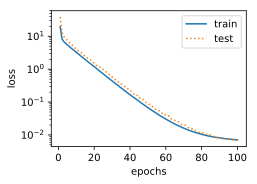

In [46]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])

线性函数拟合（⽋拟合）

final epoch: train loss 41.3042 test loss 48.419277
weight: [[14.636942]] 
bias: [1.1887435]


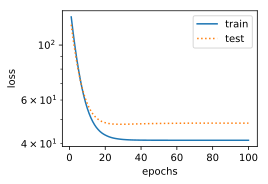

In [34]:
# 用线性函数拟合三阶多项式函数
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

训练样本不⾜（过拟合）

final epoch: train loss 0.7023766 test loss 62.97792
weight: [[ 1.6369694 -1.9532577  2.5126488]] 
bias: [-1.3187411]


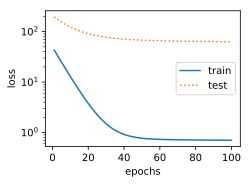

In [40]:
# 训练样本不足
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])